In [5]:
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

filenames = ['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi+_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi-_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_klong_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi0_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_photon_1_10000.csv']

In [7]:
headers = ["Label", "gpz", "wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
               "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
               "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]

# Initialize an empty DataFrame to store concatenated data
all_data = pd.DataFrame(columns=headers)

# Loop through each filename
for filename in filenames:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename, names=headers) # if headers are not present in the file, otherwise remove names=...
    # Concatenate vertically
    all_data = pd.concat([all_data, df[1:]], axis=0, ignore_index=False)

# Optionally: save the concatenated data to a new CSV file
all_data.to_csv('photon_1_data.csv', index=False)

In [10]:
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
def train_and_save(filename):
    df = pd.read_csv(filename)
    x=df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
           "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
           "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
    y=df['Label'].values
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.25, random_state=42)
    model = Sequential()
    model.add(Dense(18, input_dim=x.shape[1], activation='relu',
                    kernel_initializer='random_normal'))
    model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
    model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=tensorflow.keras.optimizers.legacy.Adam(),
                  metrics =['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto', restore_best_weights=True)
    model.fit(x_train,y_train,validation_data=(x_test,y_test),
              callbacks=[monitor],verbose=2,epochs=15)
    pred = model(x_test)
    plot_roc(pred,y_test)
    model.save("photon_ID_w_track")



In [67]:
model = train_and_save("photon_1_data.csv")

Epoch 1/15
2116/2116 - 1s - loss: -4.0844e+12 - accuracy: 0.0124 - val_loss: -1.9613e+13 - val_accuracy: 0.0100 - 1s/epoch - 657us/step
Epoch 2/15
2116/2116 - 1s - loss: -8.2734e+13 - accuracy: 0.0096 - val_loss: -1.9526e+14 - val_accuracy: 0.0101 - 1s/epoch - 577us/step
Epoch 3/15
2116/2116 - 1s - loss: -3.9562e+14 - accuracy: 0.0098 - val_loss: -7.0296e+14 - val_accuracy: 0.0101 - 1s/epoch - 570us/step
Epoch 4/15
2116/2116 - 1s - loss: -1.0994e+15 - accuracy: 0.0098 - val_loss: -1.7046e+15 - val_accuracy: 0.0101 - 1s/epoch - 567us/step
Epoch 5/15
2116/2116 - 1s - loss: -2.3835e+15 - accuracy: 0.0098 - val_loss: -3.4362e+15 - val_accuracy: 0.0101 - 1s/epoch - 572us/step
Epoch 6/15
2116/2116 - 1s - loss: -4.4762e+15 - accuracy: 0.0098 - val_loss: -6.1403e+15 - val_accuracy: 0.0101 - 1s/epoch - 567us/step
Epoch 7/15
2116/2116 - 1s - loss: -7.6335e+15 - accuracy: 0.0099 - val_loss: -1.0103e+16 - val_accuracy: 0.0101 - 1s/epoch - 570us/step
Epoch 8/15
2116/2116 - 1s - loss: -1.2097e+16 - 

ValueError: continuous format is not supported

Epoch 1/15
2116/2116 - 1s - loss: 0.2690 - accuracy: 0.8835 - val_loss: 0.2601 - val_accuracy: 0.8852 - 1s/epoch - 603us/step
Epoch 2/15
2116/2116 - 1s - loss: 0.2628 - accuracy: 0.8844 - val_loss: 0.2663 - val_accuracy: 0.8852 - 1s/epoch - 540us/step
Epoch 3/15
2116/2116 - 1s - loss: 0.2646 - accuracy: 0.8844 - val_loss: 0.2603 - val_accuracy: 0.8852 - 1s/epoch - 547us/step
Epoch 4/15
2116/2116 - 1s - loss: 0.2623 - accuracy: 0.8844 - val_loss: 0.2600 - val_accuracy: 0.8852 - 1s/epoch - 531us/step
Epoch 5/15
2116/2116 - 1s - loss: 0.2615 - accuracy: 0.8844 - val_loss: 0.2588 - val_accuracy: 0.8852 - 1s/epoch - 516us/step
Epoch 6/15
2116/2116 - 1s - loss: 0.2625 - accuracy: 0.8844 - val_loss: 0.2587 - val_accuracy: 0.8852 - 1s/epoch - 517us/step
Epoch 7/15
2116/2116 - 1s - loss: 0.2616 - accuracy: 0.8844 - val_loss: 0.2591 - val_accuracy: 0.8852 - 1s/epoch - 515us/step
Epoch 8/15
2116/2116 - 1s - loss: 0.2612 - accuracy: 0.8844 - val_loss: 0.2602 - val_accuracy: 0.8852 - 1s/epoch - 526

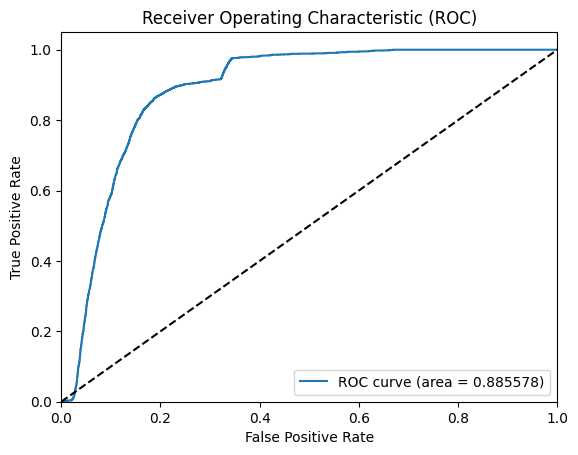

INFO:tensorflow:Assets written to: photon_ID_w_track/assets


INFO:tensorflow:Assets written to: photon_ID_w_track/assets


In [12]:
df = pd.read_csv("photon_1_data.csv")
x=df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
       "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
       "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
y=df['Label'].values
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)
model = Sequential()
model.add(Dense(18, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.legacy.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=15)
pred = model(x_test)
plot_roc(pred,y_test)
model.save("photon_ID_w_track")

